<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/GreenSpaceSAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change the runtime to GPU

In [14]:
%pip install -U segment-geospatial

In [15]:
import leafmap
from samgeo import SamGeo2

# Mount Drive

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os

# Path to your folder
folder_path = '/content/drive/My Drive/Sentinel2AIslamabad'

# List files in the folder to verify access
print(os.listdir(folder_path))

['2019-09-08.tif', '2018-12-17.tif', '2020-12-01.tif', '2021-06-09.tif', '2020-02-25.tif', '2019-12-02.tif', '2022-12-16.tif', '2022-03-31.tif', '2021-12-01.tif']


In [18]:
# List files in the folder to verify access
# files = os.listdir(folder_path)
# print("Original files:", files)
files = os.listdir(folder_path)
print("Original files:", files)
# Iterate through the files and rename them
for filename in files:
    if filename.endswith('.tif'):
        # Extract the date part from the filename
        date_str = filename[:-4]  # Remove the '.tif' extension
        # Convert to the desired format
        new_date_str = date_str.replace('-', '')  # Remove dashes
        new_filename = f"{new_date_str}.tif"  # Add the .tif extension

        # Create full paths for the old and new filenames
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f'Renamed: {filename} to {new_filename}')

# List files again to verify the changes
print(os.listdir(folder_path))

Original files: ['2019-09-08.tif', '2018-12-17.tif', '2020-12-01.tif', '2021-06-09.tif', '2020-02-25.tif', '2019-12-02.tif', '2022-12-16.tif', '2022-03-31.tif', '2021-12-01.tif']
Renamed: 2019-09-08.tif to 20190908.tif
Renamed: 2018-12-17.tif to 20181217.tif
Renamed: 2020-12-01.tif to 20201201.tif
Renamed: 2021-06-09.tif to 20210609.tif
Renamed: 2020-02-25.tif to 20200225.tif
Renamed: 2019-12-02.tif to 20191202.tif
Renamed: 2022-12-16.tif to 20221216.tif
Renamed: 2022-03-31.tif to 20220331.tif
Renamed: 2021-12-01.tif to 20211201.tif
['20190908.tif', '20181217.tif', '20201201.tif', '20210609.tif', '20200225.tif', '20191202.tif', '20221216.tif', '20220331.tif', '20211201.tif']


# Initialize Model

In [19]:
predictor = SamGeo2(
    model_id="sam2-hiera-large",
    video=True,
)

# Specify the Input Data Path

In [20]:

predictor.set_video(folder_path)

frame loading (JPEG): 100%|██████████| 9/9 [00:00<00:00, 30.87it/s]


interactive(children=(IntSlider(value=0, description='Image', max=8), Output()), _dom_classes=('widget-interac…

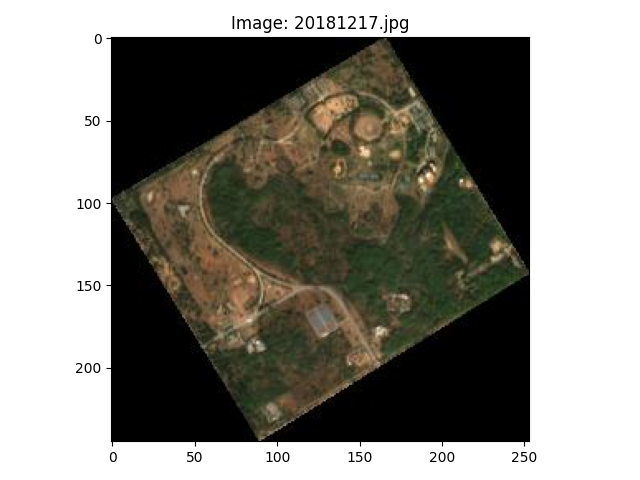

In [21]:
predictor.show_images()

# Prompts for Islamabad

In [22]:
prompts = {}

# Define the points and labels that will be the same for each frame
points = [[67.8,90.9],[155.1,133.4],[201.8,95.8],[195.8,152.2],[99.9,184.9],[152.1,52.1],[95.7,149.1],[39.3,87.9]]
labels = [1,1, 1,1,1, 0,0,0]

# Loop to generate prompts for frame_idx from 0 to 85
for i in range(1):
    prompts[i] = {
        "points": points,
        "labels": labels,
        "frame_idx": i,
    }

# Output the prompts dictionary
print(prompts)


{0: {'points': [[67.8, 90.9], [155.1, 133.4], [201.8, 95.8], [195.8, 152.2], [99.9, 184.9], [152.1, 52.1], [95.7, 149.1], [39.3, 87.9]], 'labels': [1, 1, 1, 1, 1, 0, 0, 0], 'frame_idx': 0}}


# Prompts for Tarbela

In [ ]:
prompts = {}

# Define the points and labels that will be the same for each frame
points = [[338.2,95.6],[264,75.9],[211.1,131.9],[125.8,76.7],[68.9,151.7],[142.4,239.3],[338.2,250.4],[271.1,169.1],[116.3,190.4],[106.8,94]]
labels = [1,1, 1,1,1,1,1, 0,0,0]

# Loop to generate prompts for frame_idx from 0 to 85
for i in range(1):
    prompts[i] = {
        "points": points,
        "labels": labels,
        "frame_idx": i,
    }

# Output the prompts dictionary
print(prompts)


{0: {'points': [[338.2, 95.6], [264, 75.9], [211.1, 131.9], [125.8, 76.7], [68.9, 151.7], [142.4, 239.3], [338.2, 250.4], [271.1, 169.1], [116.3, 190.4], [106.8, 94]], 'labels': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 'frame_idx': 0}}


# Prompts for Sentinel2ANewShort

In [ ]:
prompts = {}

# Define the points and labels that will be the same for each frame
points = [[793,386],[1634,587],[611,807],[1497,692],[1456,62],[684,1195],[492,496] ,[1556,820],[1520,1295],[373,770],[1236,181],[1209,953], [734, 1629],[200,838],[1195,1514],[1163,697],[1862,784],[1163,706],[1072,386]]
labels = [1,1, 1,1,1,1,1,1,0,1,1,1, 0,0,0,0,0,0,0]

# Loop to generate prompts for frame_idx from 0 to 85
for i in range(5):
    prompts[i] = {
        "points": points,
        "labels": labels,
        "frame_idx": i,
    }

# Output the prompts dictionary
print(prompts)


{0: {'points': [[793, 386], [1634, 587], [611, 807], [1497, 692], [1456, 62], [684, 1195], [492, 496], [1556, 820], [1520, 1295], [373, 770], [1236, 181], [1209, 953], [734, 1629], [200, 838], [1195, 1514], [1163, 697], [1862, 784], [1163, 706], [1072, 386]], 'labels': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'frame_idx': 0}, 1: {'points': [[793, 386], [1634, 587], [611, 807], [1497, 692], [1456, 62], [684, 1195], [492, 496], [1556, 820], [1520, 1295], [373, 770], [1236, 181], [1209, 953], [734, 1629], [200, 838], [1195, 1514], [1163, 697], [1862, 784], [1163, 706], [1072, 386]], 'labels': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'frame_idx': 1}, 2: {'points': [[793, 386], [1634, 587], [611, 807], [1497, 692], [1456, 62], [684, 1195], [492, 496], [1556, 820], [1520, 1295], [373, 770], [1236, 181], [1209, 953], [734, 1629], [200, 838], [1195, 1514], [1163, 697], [1862, 784], [1163, 706], [1072, 386]], 'labels': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 

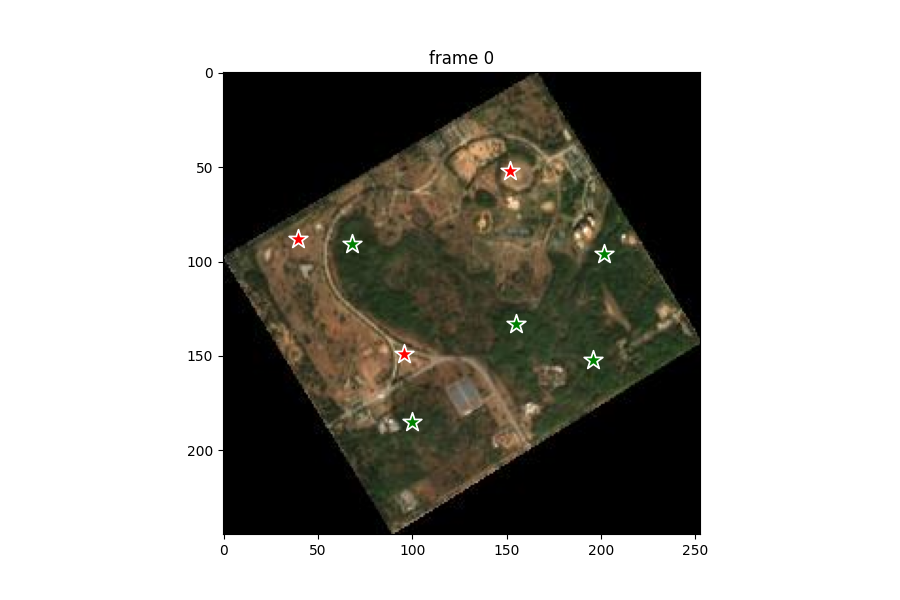

In [23]:
predictor.show_prompts(prompts, frame_idx=0)

# Segment the Objects

In [24]:
predictor.predict_video()

propagate in video: 100%|██████████| 9/9 [06:54<00:00, 46.01s/it]


# Save Results

In [25]:
predictor.save_video_segments("segmentsofSentinel2AIslamabad")

Rendering frames: 100%|██████████| 9/9 [00:00<00:00, 52.98it/s]


In [26]:
predictor.save_video_segments_blended(
    "TS_blended_Sentinel2A_Islamabad", fps=5, output_video="/content/segments_blended_Sentinel2AIslamabad.mp4"
)

Rendering frames: 100%|██████████| 9/9 [00:01<00:00,  5.95it/s]


Video saved as /content/segments_blended_Sentinel2AIslamabad.mp4
